In [4]:
import nltk
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.utils import to_categorical

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akmal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akmal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\akmal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [9]:
df1 = pd.read_csv('dataset/df_prabowo_april_2025.csv', sep=';')
df1.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1917264334755094745,Tue Apr 29 17:06:53 +0000 2025,213,Anggota DPR Komisi II Komarudin WatoBun menila...,1917264334755094745,https://pbs.twimg.com/ext_tw_video_thumb/19172...,NaN,in,NaN,3,15,85,https://x.com/Nobody_2811/status/1917264334755...,1787788662295683072,Nobody_2811
1,1917231645486354588,Tue Apr 29 14:56:59 +0000 2025,137,Senin sore (28/4) saya menghadiri undangan per...,1917231645486354588,https://pbs.twimg.com/ext_tw_video_thumb/19172...,NaN,in,NaN,3,25,40,https://x.com/AgusYudhoyono/status/19172316454...,842986784,AgusYudhoyono
2,1917227526818316489,Tue Apr 29 14:40:37 +0000 2025,2361,Dulu LBP bgitu kejam ke Presiden @prabowo bahk...,1917227526818316489,https://pbs.twimg.com/media/GptcRQ7bgAAuKLZ.jpg,NaN,in,NaN,29,177,1010,https://x.com/bachrum_achmadi/status/191722752...,105085302,bachrum_achmadi
3,1917222387415945710,Tue Apr 29 14:20:12 +0000 2025,113,Karena saya cinta Polri makanya saya kritik. U...,1917222387415945710,https://pbs.twimg.com/ext_tw_video_thumb/19172...,NaN,in,NaN,1,1,45,https://x.com/_riverheaven/status/191722238741...,975389335775199232,_riverheaven
4,1917207823710388289,Tue Apr 29 13:22:19 +0000 2025,252,Setuju untuk mas Angga Raka Prabowo menjadi Ju...,1917207823710388289,NaN,NaN,in,NaN,1,22,54,https://x.com/PartaiSocmed/status/191720782371...,869327120,PartaiSocmed


In [10]:
df2 = pd.read_csv('dataset/df_prabowo_januari_2025.csv', sep=';')
df2.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,"1,88464E+18",Wed Jan 29 16:19:59 +0000 2025,1222,Kembali di temukan pembuatan pagar di laut di ...,"1,88464E+18",https://pbs.twimg.com/ext_tw_video_thumb/18846...,NaN,in,NaN,9,38,722,https://x.com/H4T14K4LN4L42/status/18846376246...,"1,12967E+18",H4T14K4LN4L42
1,"1,88463E+18",Wed Jan 29 15:43:03 +0000 2025,254,Acara berlangsung secara sederhana dengan unda...,"1,88463E+18",NaN,NaN,in,"Kota Yogyakarta, Yogyakarta",1,11,26,https://x.com/LembagaKERIS/status/188462833078...,497882992,LembagaKERIS
2,"1,8846E+18",Wed Jan 29 14:05:51 +0000 2025,462,Jangan Biarkan Publik Mengira Jokowi Masih Pre...,"1,8846E+18",NaN,NaN,in,"-6.252543,106.806343",14,85,199,https://x.com/alisyarief/status/18846038686650...,30201110,alisyarief
3,"1,8846E+18",Wed Jan 29 13:56:41 +0000 2025,248,Prioritas utamanya: - MBG yg gak kemakan &amp;...,"1,8846E+18",NaN,NaN,in,NaN,4,4,77,https://x.com/titapuspitarini/status/188460156...,80850731,titapuspitarini
4,"1,8846E+18",Wed Jan 29 13:41:46 +0000 2025,1366,Bapak Presiden @prabowo yth terungkapnya berba...,"1,8846E+18",NaN,NaN,in,NaN,8,70,516,https://x.com/msaid_didu/status/18845978099761...,"1,11799E+18",msaid_didu


In [12]:
df3 = pd.read_csv('dataset/df_prabowo_februari_2025.csv', sep=';')
df3.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,"1,89525E+18",Thu Feb 27 23:22:00 +0000 2025,700,Blm pernah terjadi di dunia sekalipun. 3 Presi...,"1,89525E+18",https://pbs.twimg.com/ext_tw_video_thumb/18952...,NaN,in,"DKI Jakarta, Indonesia",41,382,125,https://x.com/Franken_blues/status/18952530778...,"1,30124E+18",Franken_blues
1,"1,89525E+18",Thu Feb 27 22:50:59 +0000 2025,121,Kesempatan langka Bpk Presiden Prabowo berbica...,"1,89525E+18",NaN,NaN,in,Sumbermanjing,2,3,68,https://x.com/Outstandjing/status/189524527217...,59363362,Outstandjing
2,"1,89522E+18",Thu Feb 27 21:24:59 +0000 2025,212,3 Oktober 2011 dan saat belum berkuasa menjadi...,"1,89522E+18",https://pbs.twimg.com/media/Gk0v2DBWsAABvzo.jpg,NaN,in,Indonesia,3,31,98,https://x.com/Nicho_Silalahi/status/1895223630...,75519742,Nicho_Silalahi
3,"1,89515E+18",Thu Feb 27 16:36:15 +0000 2025,72,Kadrun sudah mulai turun ke jalan artinya Pres...,"1,89515E+18",NaN,NaN,in,di bawah langit tanpa batas,3,50,17,https://x.com/silent_night21/status/1895150965...,"1,86108E+18",silent_night21
4,"1,89513E+18",Thu Feb 27 14:59:26 +0000 2025,95,Pengelolaan hutan bukan sekadar memiliki izin ...,"1,89513E+18",https://pbs.twimg.com/ext_tw_video_thumb/18951...,NaN,in,Jakarta,11,138,25,https://x.com/RajaJuliAntoni/status/1895126604...,438832278,RajaJuliAntoni


In [13]:
df4 = pd.read_csv('dataset/df_prabowo_maret_2025.csv', sep=';')
df4.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1906370082558890432,Sun Mar 30 23:56:34 +0000 2025,92,@bujas__ @hrdbacot dan ini keberhasilan presid...,1906495800852758702,NaN,bjs________,in,NaN,0,0,0,https://x.com/JBjamesbond07/status/19064958008...,1759273445500850176,JBjamesbond07
1,1906477277870989601,Sun Mar 30 22:42:58 +0000 2025,74,Rocky Gerung Bongkar Borok Tim Komunikasi Prab...,1906477277870989601,NaN,NaN,in,NaN,1,2,36,https://x.com/OposisiCerdas/status/19064772778...,887743587579944960,OposisiCerdas
2,1906393310362751464,Sun Mar 30 17:09:18 +0000 2025,15,Oknum yg mau tembak Presiden Prabowo wajib dit...,1906393310362751464,https://pbs.twimg.com/media/GnTenLfb0AAVcCz.jpg,NaN,in,NaN,0,3,7,https://x.com/cagubnyinyir2/status/19063933103...,1013331201396912128,cagubnyinyir2
3,1906367746746859858,Sun Mar 30 15:27:44 +0000 2025,127,Ijin jend @prabowo Bang @sjafriesjams Akun yg ...,1906367746746859858,NaN,NaN,in,NaN,0,5,68,https://x.com/Minang_cyber/status/190636774674...,1350917154,Minang_cyber
4,1906365149809954834,Sun Mar 30 15:17:24 +0000 2025,82,Presiden Prabowo Subianto Ucapkan Selamat Idul...,1906365149809954834,https://pbs.twimg.com/ext_tw_video_thumb/19063...,NaN,in,NaN,1,5,23,https://x.com/Ndons_Back/status/19063651498099...,1289954556411969537,Ndons_Back


In [14]:
df5 = pd.read_csv('dataset/df_prabowo_desember_2024.csv', sep=';')
df5.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,"1,86824E+18",Sun Dec 15 23:10:23 +0000 2024,319,@tvOneNews Inilah derita rakyat Indonesia pak ...,"1,86843E+18",NaN,tvOneNews,in,"DKI Jakarta, Indonesia🇲🇨",1,11,21,https://x.com/ommi_siregar/status/186843345433...,"1,42979E+18",ommi_siregar
1,"1,86834E+18",Sun Dec 15 17:09:11 +0000 2024,5131,Yg tidak di liput Media tv Manapun dwmo mahasi...,"1,86834E+18",https://pbs.twimg.com/ext_tw_video_thumb/18683...,NaN,in,NaN,37,166,2296,https://x.com/H4T14K4LN4L42/status/18683425515...,"1,12967E+18",H4T14K4LN4L42
2,"1,86832E+18",Sun Dec 15 15:29:34 +0000 2024,578,Jempol -Jempol Netizen X-Twitter di dengar Ist...,"1,86832E+18",https://pbs.twimg.com/media/Ge2Y2h-aMAAR74f.jpg,NaN,in,I N D O N E S I A,9,112,217,https://x.com/Heraloebss/status/18683174855625...,"1,25182E+18",Heraloebss
3,"1,8683E+18",Sun Dec 15 14:26:56 +0000 2024,2823,Selamatkan lahan pertanian subur Bpk Presiden ...,"1,8683E+18",https://pbs.twimg.com/ext_tw_video_thumb/18683...,NaN,in,NaN,15,75,1383,https://x.com/msaid_didu/status/18683017212709...,"1,11799E+18",msaid_didu
4,"1,86828E+18",Sun Dec 15 14:07:35 +0000 2024,364,@DokterTifa Pak @prabowo Anda Boleh Diam &amp;...,"1,8683E+18",NaN,DokterTifa,in,NaN,0,15,44,https://x.com/MMehonx/status/1868296853688885521,"1,64246E+18",MMehonx


In [15]:
df_prabowo = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df_prabowo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      3701 non-null   object
 1   created_at               3701 non-null   object
 2   favorite_count           3701 non-null   int64 
 3   full_text                3701 non-null   object
 4   id_str                   3701 non-null   object
 5   image_url                2333 non-null   object
 6   in_reply_to_screen_name  615 non-null    object
 7   lang                     3701 non-null   object
 8   location                 1476 non-null   object
 9   quote_count              3701 non-null   int64 
 10  reply_count              3701 non-null   int64 
 11  retweet_count            3701 non-null   int64 
 12  tweet_url                3701 non-null   object
 13  user_id_str              3701 non-null   object
 14  username                 3701 non-null  

In [16]:
df_prabowo[df_prabowo.duplicated()]

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username


In [17]:
df_prabowo['created_at'] = pd.to_datetime(df_prabowo['created_at'])
df_prabowo.info()


C:\Users\akmal\AppData\Local\Temp\ipykernel_18056\908094412.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_prabowo['created_at'] = pd.to_datetime(df_prabowo['created_at'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   conversation_id_str      3701 non-null   object             
 1   created_at               3701 non-null   datetime64[ns, UTC]
 2   favorite_count           3701 non-null   int64              
 3   full_text                3701 non-null   object             
 4   id_str                   3701 non-null   object             
 5   image_url                2333 non-null   object             
 6   in_reply_to_screen_name  615 non-null    object             
 7   lang                     3701 non-null   object             
 8   location                 1476 non-null   object             
 9   quote_count              3701 non-null   int64              
 10  reply_count              3701 non-null   int64              
 11  retweet_count            3701 

In [20]:
df_prabowo.describe()

,favorite_count,quote_count,reply_count,retweet_count
count,3701.000000,3701.000000,3701.000000,3701.000000
mean,1371.086463,51.944610,115.556066,372.033234
std,5174.023834,310.433239,245.840008,1377.582718
min,10.000000,0.000000,0.000000,0.000000
25%,146.000000,2.000000,11.000000,31.000000
50%,286.000000,6.000000,39.000000,67.000000
75%,774.000000,18.000000,111.000000,223.000000
max,138531.000000,6989.000000,5132.000000,36409.000000


In [19]:
jumlah_per_bulan = df_prabowo.groupby(df_prabowo['created_at'].dt.to_period('M')).size()
jumlah_per_bulan


C:\Users\akmal\AppData\Local\Temp\ipykernel_18056\1623450294.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  jumlah_per_bulan = df_prabowo.groupby(df_prabowo['created_at'].dt.to_period('M')).size()


created_at
2024-11    458
2024-12    652
2025-01    557
2025-02    864
2025-03    714
2025-04    456
Freq: M, dtype: int64

In [21]:
df_prabowo['full_text'].isnull().sum()

0

In [39]:
df_text_prabowo = df_prabowo['full_text'] 
df_text_prabowo.to_csv("prabowo_text.csv", index=False)

In [40]:
df_prab = pd.read_csv('prabowo_text.csv')
df_prab

,full_text
0,Anggota DPR Komisi II Komarudin WatoBun menila...
1,Senin sore (28/4) saya menghadiri undangan per...
2,Dulu LBP bgitu kejam ke Presiden @prabowo bahk...
3,Karena saya cinta Polri makanya saya kritik. U...
4,Setuju untuk mas Angga Raka Prabowo menjadi Ju...
...,...
3696,Ini bukti susu gratis @gibran_tweet proyek bis...
3697,Kita beri waktu bagi bapak Presiden @prabowo d...
3698,Kunker pertama Presiden Prabowo ke luar negeri...
3699,Presiden Prabowo Subianto tiba di Beijing Chin...


# Text Preprocessing

In [5]:
df = pd.read_csv('dataset/prabowo_text_labeled.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  3701 non-null   object
 1   label      3701 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


In [6]:
df['label'].value_counts()

label
neutral     1971
negative    1450
positive     280
Name: count, dtype: int64

In [7]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stpwds_id = list(set(stopwords.words('indonesian')))

In [8]:
def text_proses(teks):
  teks = teks.lower()
  teks = re.sub("@[A-Za-z0-9_]+"," ", teks) #Menghilangkan mention
  teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag
  teks = re.sub(r"\\n"," ",teks) #Menghilangkan \n
  teks = teks.strip()
  teks = re.sub(r"http\S+", " ", teks) #Menghilangkan link
  teks = re.sub(r"www.\S+", " ", teks) #Menghilangkan link
  teks = re.sub("[^A-Za-z\s']"," ", teks) #Menghilangkan yang bukan huruf
  teks = re.sub("rt"," ",teks) #Menghilangkan RT
  tokens = word_tokenize(teks)
  teks = ' '.join([word for word in tokens if word not in stpwds_id])
  teks = stemmer.stem(teks)
  return teks

In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Setup stemmer dan stopwords hanya sekali
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stpwds_id = set(stopwords.words("indonesian"))
tokenizer = RegexpTokenizer(r"\b[^\d\W]+\b")  # hanya ambil kata (bukan angka/simbol)

def text_proses_efisien(teks):
    teks = teks.lower()
    teks = re.sub(r'(@\w+|#\w+|http\S+|www.\S+|\\n|rt)', ' ', teks)
    teks = re.sub(r"[^a-zA-Z\s']", ' ', teks)  # hanya huruf dan spasi
    tokens = tokenizer.tokenize(teks)  # tokenizer cepat
    tokens = [t for t in tokens if t not in stpwds_id]
    stemmed_tokens = [stemmer.stem(t) for t in tokens]
    return ' '.join(stemmed_tokens)


In [9]:
df['text_processed'] = df['full_text'].apply(text_proses)
df.head()

,full_text,label,text_processed
0,Anggota DPR Komisi II Komarudin WatoBun menila...,neutral,anggota dpr komisi ii komarudin watobun nilai ...
1,Senin sore (28/4) saya menghadiri undangan per...,neutral,senin sore hadir undang pe emuan urus badan ke...
2,Dulu LBP bgitu kejam ke Presiden @prabowo bahk...,negative,lbp bgitu kejam presiden hancur hancur nya pdh...
3,Karena saya cinta Polri makanya saya kritik. U...,neutral,cinta polri kritik oknum polisi main main nark...
4,Setuju untuk mas Angga Raka Prabowo menjadi Ju...,positive,tuju mas angga raka prabowo jubir presiden ban...


In [10]:
df['label_num'] = df['label'].replace({'neutral' : 0, 'positive' : 1, 'negative' : 2})
df.head()

,full_text,label,text_processed,label_num
0,Anggota DPR Komisi II Komarudin WatoBun menila...,neutral,anggota dpr komisi ii komarudin watobun nilai ...,0
1,Senin sore (28/4) saya menghadiri undangan per...,neutral,senin sore hadir undang pe emuan urus badan ke...,0
2,Dulu LBP bgitu kejam ke Presiden @prabowo bahk...,negative,lbp bgitu kejam presiden hancur hancur nya pdh...,2
3,Karena saya cinta Polri makanya saya kritik. U...,neutral,cinta polri kritik oknum polisi main main nark...,0
4,Setuju untuk mas Angga Raka Prabowo menjadi Ju...,positive,tuju mas angga raka prabowo jubir presiden ban...,1


# Feature Engineering

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.text_processed, df.label_num, test_size=0.2,shuffle=True,random_state=46, stratify=df.label_num)
y_train.value_counts(), y_test.value_counts()

(label_num
 0    1576
 2    1160
 1     224
 Name: count, dtype: int64,
 label_num
 0    395
 2    290
 1     56
 Name: count, dtype: int64)

In [12]:
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)

jml_vocab = len(Vectorize.vocabulary_.keys())
max_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab:",jml_vocab)
print("Panjang maksimum kalimat:",max_len,"kata")

Jumlah vocab: 7464
Panjang maksimum kalimat: 44 kata


# Model Architecture Definition

In [13]:
text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_len,
                                       input_shape=(1,)
                                       )

text_vectorization.adapt(X_train)

In [22]:
embedding = Embedding(input_dim=jml_vocab + 1,
                      output_dim=128,
                      input_length=max_len
                      )

In [23]:
X_train_vectorized = text_vectorization(X_train)
X_test_vectorized = text_vectorization(X_test)
print(X_train_vectorized[:5])

tf.Tensor(
[[   2    3    6  168  583 2737  395  395  316   20  181    7  603   56
    12  574   30 2676  102    2   19  530  545  323    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   3  156  164  486  362 2551 4024  337    8 4763 2748  158   63 3486
     2 1651  868  158 4196    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   3    2   19  673   49    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 187    2    3    6 4416  624 3776   19    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 893 2957  342  184 2440   78  193    2   18  944  121  164    4 3662
 

In [24]:
X_train_vectorized.shape, X_test_vectorized.shape

(TensorShape([2960, 44]), TensorShape([741, 44]))

# Training Model

In [25]:
import numpy as np
print(np.unique(y_train, return_counts=True))  # Cek distribusi kelas

(array([0, 1, 2], dtype=int64), array([1576,  224, 1160], dtype=int64))


In [26]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.626057529610829, 1: 4.404761904761905, 2: 0.8505747126436781}

In [28]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, Embedding  
from keras import regularizers  
from keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision



model = Sequential()
model.add(Input(shape=(max_len,)))
model.add(embedding)
model.add(LSTM(units=64,
          return_sequences=True,
          ))
model.add(Dropout(0.2))
model.add(LSTM(units=32,
               ))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3, activation='softmax'))

# Kompilasi model dengan learning rate yang lebih kecil
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer= Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  
    restore_best_weights=True
)
history = model.fit(
    X_train_vectorized,
    y_train,
    epochs=100,
    validation_data=(X_test_vectorized, y_test),
    batch_size=64,
    callbacks=[early_stopping],
    class_weight=class_weights  
)

Epoch 1/100
47/47 [==============================] - 18s 151ms/step - loss: 0.9578 - accuracy: 0.6902 - val_loss: 0.8559 - val_accuracy: 0.6856
Epoch 2/100
47/47 [==============================] - 4s 92ms/step - loss: 0.7300 - accuracy: 0.7787 - val_loss: 0.8807 - val_accuracy: 0.5857
Epoch 3/100
47/47 [==============================] - 4s 92ms/step - loss: 0.5714 - accuracy: 0.7733 - val_loss: 0.9929 - val_accuracy: 0.6302
Epoch 4/100
47/47 [==============================] - 4s 91ms/step - loss: 0.4427 - accuracy: 0.8392 - val_loss: 1.1287 - val_accuracy: 0.6653
Epoch 5/100
47/47 [==============================] - 4s 90ms/step - loss: 0.3669 - accuracy: 0.8976 - val_loss: 1.3002 - val_accuracy: 0.5574
Epoch 6/100
47/47 [==============================] - 4s 91ms/step - loss: 0.4775 - accuracy: 0.8240 - val_loss: 1.0767 - val_accuracy: 0.6559


24/24 [==============================] - 3s 22ms/step


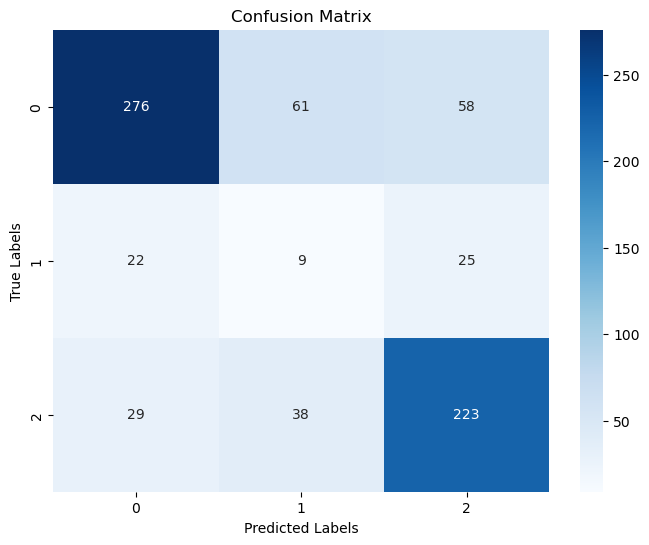

              precision    recall  f1-score   support

           0       0.84      0.70      0.76       395
           1       0.08      0.16      0.11        56
           2       0.73      0.77      0.75       290

    accuracy                           0.69       741
   macro avg       0.55      0.54      0.54       741
weighted avg       0.74      0.69      0.71       741



In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Prediksi
y_pred_probs = model.predict(X_test_vectorized)
y_pred = np.argmax(y_pred_probs, axis=1)  # Mengambil indeks dengan probabilitas tertinggi

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['Netral', 'Positif', 'Negatif']

# 3. Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 4. Laporan klasifikasi (opsional tapi berguna)
print(classification_report(y_test, y_pred))


In [ ]:
y_train[:5]

1332    0
2216    2
2997    2
397     0
2340    2
Name: label_num, dtype: int64